# Include Toolbox

In [1]:
using Plots
import EzXML
import XMLDict

In [2]:
include("ToolBox.jl")
using .ToolBox

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [3]:
Geometry.satellite_trajectory

Main.ToolBox.Geometry

### Define test data

In [5]:
path_img1 = "/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_meta_1 = "/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod_1 = "/Users/eyu/YOEO_local/data/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF";

In [6]:
reflector_height = [42.753,43.282,44.475]
reflector_index_img1 = [[1126,6087],[1123, 6100],[1127, 6111]]
line_sample = vcat(reflector_index_img1'...)

3×2 Array{Int64,2}:
 1126  6087
 1123  6100
 1127  6111

In [7]:
view =[1000:1300, 5900:6400];

## Load library

In [8]:
data = Load.slc_data(path_img1,view)
meta = Load.slc_meta(path_meta_1);
precise_orbit = Load.precise_orbit(path_pod_1,meta["t_0"]);

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [34]:
## open xml files
doc = EzXML.readxml(path_meta_1)
meta_dict = XMLDict.xml_dict(doc);

OrderedCollections.OrderedDict{Any,Any} with 3 entries:
  :version  => "1.0"
  :encoding => "UTF-8"
  "product" => OrderedCollections.OrderedDict{Any,Any}("adsHeader"=>OrderedColl…

### variables from annotations

In [35]:
k_psi = parse(Float64, meta_dict["product"]["generalAnnotation"]["productInformation"]["azimuthSteeringRate"])
f_etac = meta_dict["product"]["dopplerCentroid"]["dcEstimateList"]["dcEstimate"][1]["dataDcPolynomial"]
k_a = meta_dict["product"]["generalAnnotation"]["azimuthFmRateList"]["azimuthFmRate"][1]["azimuthFmRatePolynomial"]
f_c = parse(Float64, meta_dict["product"]["generalAnnotation"]["productInformation"]["radarFrequency"])
v_s = meta_dict["product"]["generalAnnotation"]["orbitList"]["orbit"][1]["velocity"]
N_l = parse(Int, meta_dict["product"]["swathTiming"]["linesPerBurst"])
Delta_t_s = parse(Float64, meta_dict["product"]["imageAnnotation"]["imageInformation"]["azimuthTimeInterval"])
N_s = parse(Int, meta_dict["product"]["imageAnnotation"]["imageInformation"]["numberOfSamples"])
Delta_tau_s = 1/parse(Float64, meta_dict["product"]["generalAnnotation"]["productInformation"]["rangeSamplingRate"])
tau0 = parse(Float64, meta_dict["product"]["imageAnnotation"]["imageInformation"]["slantRangeTime"]);

In [36]:
Delta_t_s*N_l/2

0.002055556299999998

In [67]:
meta_dict["product"]["generalAnnotation"]["azimuthFmRateList"]["azimuthFmRate"]

11-element Array{Any,1}:
 OrderedCollections.OrderedDict{Any,Any}("azimuthTime"=>"2017-03-15T05:39:52.253564","t0"=>"6.022480032448950e-03","azimuthFmRatePolynomial"=>OrderedCollections.OrderedDict{Any,Any}(:count=>"3",""=>"-2.044307734562802e+03 3.531865114928972e+05 -5.414933982731982e+07"))
 OrderedCollections.OrderedDict{Any,Any}("azimuthTime"=>"2017-03-15T05:39:55.011841","t0"=>"6.022480032448950e-03","azimuthFmRatePolynomial"=>OrderedCollections.OrderedDict{Any,Any}(:count=>"3",""=>"-2.044382428850449e+03 3.531827275519248e+05 -5.414758200250935e+07"))
 OrderedCollections.OrderedDict{Any,Any}("azimuthTime"=>"2017-03-15T05:39:57.770118","t0"=>"6.022480032448950e-03","azimuthFmRatePolynomial"=>OrderedCollections.OrderedDict{Any,Any}(:count=>"3",""=>"-2.044451164497124e+03 3.531766509331628e+05 -5.414293227228849e+07"))
 OrderedCollections.OrderedDict{Any,Any}("azimuthTime"=>"2017-03-15T05:40:00.528395","t0"=>"6.022480032448950e-03","azimuthFmRatePolynomial"=>OrderedCollections.Orde

In [42]:
meta_dict["product"]["swathTiming"]["burstList"]["burst"][1]["azimuthTime"]

"2017-03-15T05:39:50.703105"

In [47]:
2.033016248000000e+03
2.035774804554600e+03

1.554116558005821e-8

In [43]:
50.703105 + 1626*2.055556280538440*10^(-3)/2

52.37427225607775

In [60]:
Vs_list = Array{Float64,2}(undef, 17, 3);

In [63]:
for i in 1:17
    Vs_list[i, 1] = parse(Float64, meta_dict["product"]["generalAnnotation"]["orbitList"]["orbit"][i]["velocity"]["x"])
    Vs_list[i, 2] = parse(Float64, meta_dict["product"]["generalAnnotation"]["orbitList"]["orbit"][i]["velocity"]["y"])
    Vs_list[i, 3] = parse(Float64, meta_dict["product"]["generalAnnotation"]["orbitList"]["orbit"][i]["velocity"]["z"])
end

Vs = sqrt.(Vs_list[:, 1].^2 + Vs_list[:, 2].^2 + Vs_list[:, 3].^2)

17-element Array{Float64,1}:
 7587.062999748382 
 7587.232736276238 
 7587.404235350363 
 7587.577402487056 
 7587.752140892062 
 7587.928352624094 
 7588.105940302066 
 7588.284803038134 
 7588.4648385995115
 7588.645946973896 
 7588.828023587031 
 7589.010962483147 
 7589.19465659357  
 7589.378999062926 
 7589.563879176038 
 7589.74918879447  
 7589.934818065274 

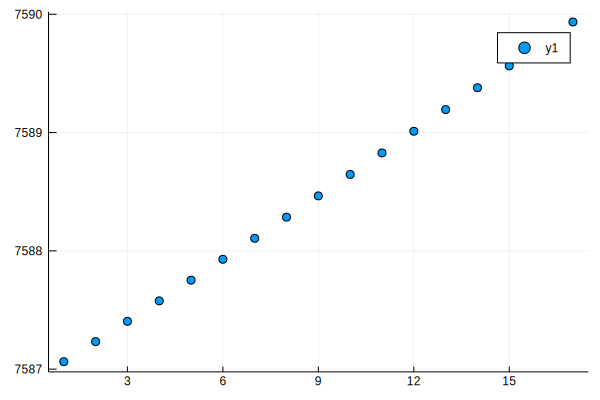

In [65]:
scatter(Vs)

In [ ]:
state_vectors_0 = polyval_state_vectors(state_vectors_poly,time,state_vectors_mean, state_vectors_std)

In [47]:
c = 299792458
t_start = meta["t_start"]
t_stop = meta["t_stop"]
sign_angle  = meta["right_looking"] ? 1 : -1
theta_0 = sign_angle*abs(meta["incidence_angle_mid"]*pi/180)
range_pixel_spacing =  c/(2*meta["range_sampling_rate"])
inv_azimuth_frequency =  1/meta["azimuth_frequency"]
r_near =  meta["slant_range_time"]  *c/2

time =  t_start + (line_sample[i,1]-1)*inv_azimuth_frequency


UndefVarError: UndefVarError: i not defined

In [65]:
t_0 = meta["t_0"]
t0 = DateTime(2017,3,15,5,39,50,703) # from meta_dict["product"]["swathTiming"]["burstList"]["burst"][1]["azimuthTime"]

#f = open("POD_path.txt")
path = "/Users/eyu/YOEO_local/data/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"
orbit_state_vector, time_state_vector = Load.precise_orbit(path, t0);
state_vectors_poly, state_vectors_mean, state_vectors_std = Geometry.satellite_trajectory(orbit_state_vector, time_state_vector, t_start, t_stop);



InexactError: InexactError: divexact(Int64, -24050.703)

In [45]:
t0 = meta_dict["product"]["swathTiming"]["burstList"]["burst"][1]["azimuthTime"]

time = 50.703105 + N_l*Delta_t_s/2
Geometry.polyval_state_vectors(state_vectors_poly, time, state_vectors_mean, state_vectors_std)


6-element Array{Float64,1}:
     3.847400166165593e6 
     1.1786722078830188e6
     5.810671645267154e6 
  6355.7630545399425     
  -323.8435200476904     
 -4132.797514199339      

In [53]:
t0 = meta_dict["product"]["swathTiming"]["burstList"]["burst"][1]["azimuthTime"]

"2017-03-15T05:39:50.703105"

In [64]:
using Dates
DateTime(2017,3,15,5,39,50,703)

2017-03-15T05:39:50.703

 ## SlcUtil library

In [7]:
test = SlcRaw(view,meta,data)

SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[1000:1300,5900:6400]

In [8]:
size(test)

(301, 501)

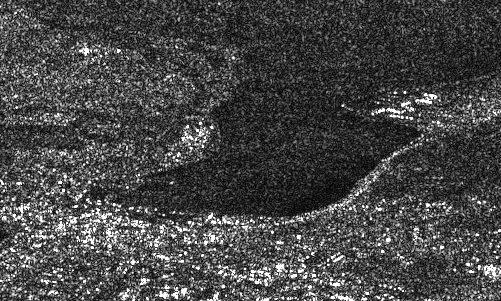

In [9]:
SlcUtil.show_img(test)